In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Only use up to 2014, to avoid data type change, no data for 2010.**

How they cluster on the map, which neighborhoods

Cluster type of offense by color on the map

Pie chart of types of offense in neighborhood vs city at large

Pull in property value data/which are nice neighborhoods

Line graph of total crime in city vs. in specific neighborhood



fillna(with the mean of the coordinates for each specific neighborhood)

df2004[df2004['X Coordinate'].isnull()]

## Done: 

Pie Chart of distribution of offenses over time **(need to make the labels the same year-to-year)**

City wide location data of each crime **(put on a heat map?)**

Time Of Day

Seasonal changes




In [2]:
df2004 = pd.read_csv('crime_incident_data2004.csv')
df2005 = pd.read_csv('crime_incident_data2005.csv')
df2006 = pd.read_csv('crime_incident_data2006.csv')
df2007 = pd.read_csv('crime_incident_data2007.csv')
df2008 = pd.read_csv('crime_incident_data2008.csv')
df2009 = pd.read_csv('crime_incident_data2009.csv')
df2011 = pd.read_csv('crime_incident_data2011.csv')
df2012 = pd.read_csv('crime_incident_data2012.csv')
df2013 = pd.read_csv('crime_incident_data2013.csv')
df2014 = pd.read_csv('crime_incident_data2014.csv')

In [3]:
df2004['Year'] = 2004
df2005['Year'] = 2005
df2006['Year'] = 2006
df2007['Year'] = 2007
df2008['Year'] = 2008
df2009['Year'] = 2009
df2011['Year'] = 2011
df2012['Year'] = 2012
df2013['Year'] = 2013
df2014['Year'] = 2014

In [4]:
df = pd.concat([df2004, df2005, df2006, df2007, df2008, df2009, df2011, df2012, df2013, df2014])
all_years = [2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014]

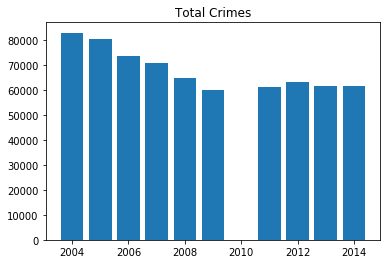

In [5]:
plt.bar(all_years, [len(df[df['Year']==x]) for x in all_years])
plt.title('Total Crimes')

plt.show()

## Location of Crimes

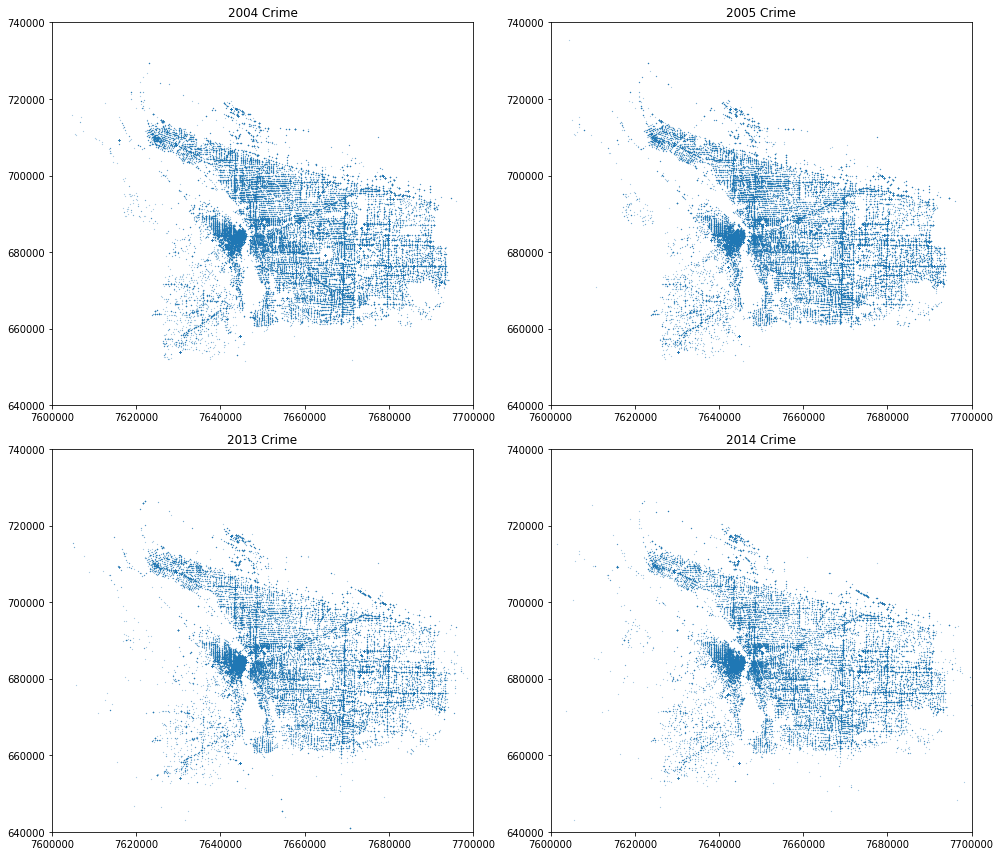

In [6]:
plt.figure(figsize=(14,12))
years = [2004, 2005, 2013, 2014]

for i in range(4):

    plt.subplot(2,2,i+1)
    plt.scatter(df[df['Year']==years[i]]['X Coordinate'], df[df['Year']==years[i]]['Y Coordinate'], s = .02)
    plt.xlim(7600000, 7700000)
    plt.ylim(640000, 740000)
    plt.title('{} Crime'.format(years[i]))

plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

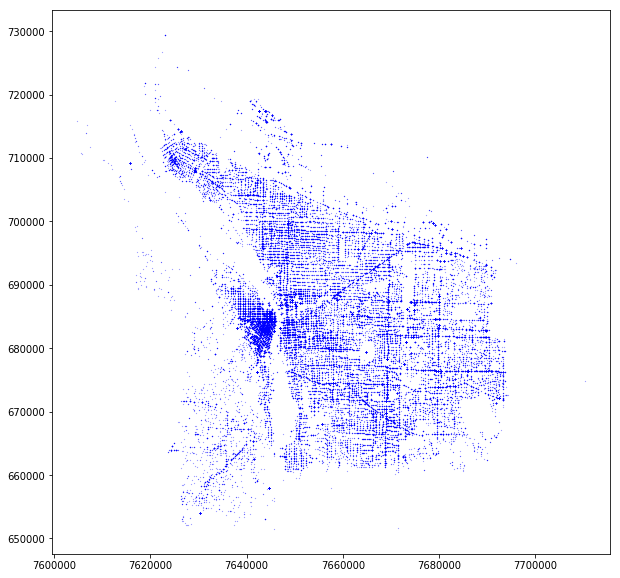

In [69]:
plt.figure(figsize=(10,10))
year = 2004
crime_type = 'Larceny'

plt.scatter(df[df['Year']==year]['X Coordinate'], df[df['Year']==year]['Y Coordinate'], s=.02, c='b')
plt.scatter(df[df['Year']==year and df['Major Offense Type']==crime_type]['X Coordinate'], df[df['Year']==year and df['Major Offense Type']==crime_type]['Y Coordinate'], s=.02, c='r')
plt.xlim(7600000, 7700000)
plt.ylim(640000, 740000)
plt.title('{} Crime'.format(year))

plt.tight_layout()
plt.show()

## Type of Crime

Let's see the types of crimes reported in Portland.

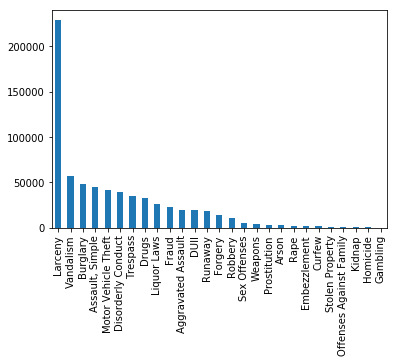

In [9]:
df['Major Offense Type'].value_counts().plot(kind='bar')

plt.show()

Larceny (theft) dominates the dataset. Let's see how things look without it.

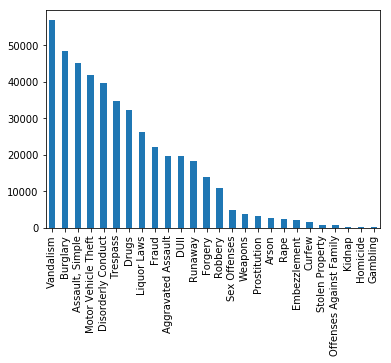

In [10]:
df['Major Offense Type'].value_counts()[1:].plot(kind='bar')

plt.show()

There are several types of crime which are quite common, and a tail of rare crimes (everything starting with Sex Offenses). It's still hard to see how many of those crime have actually occured, so let's look at those specifically.

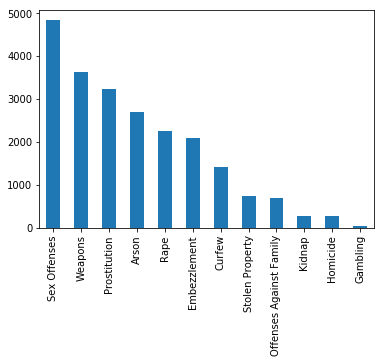

In [12]:
df['Major Offense Type'].value_counts()[-12:].plot(kind='bar')

plt.show()

Let's just look at homicides in the city.

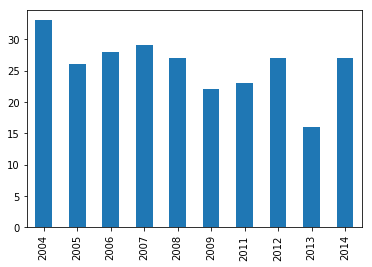

In [33]:
df[df['Major Offense Type']=='Homicide']['Year'].value_counts().sort_index().plot(kind='bar')
plt.show()

We get the general sense from the data that crime has decreased from 2004 to 2014, but let's look at this a bit more concretely. Specifically, let's compare the first three years of data (2004-2006) with the last three (2012-2014). By spanning a few years we may smooth out anomolous years.

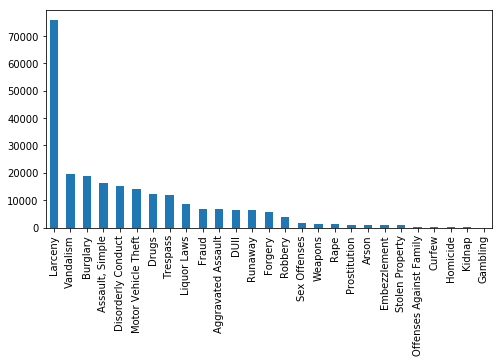

In [55]:
plt.figure(figsize=(8,4))
df[df['Year'].isin([2004, 2005, 2006])]['Major Offense Type'].value_counts().plot(kind='bar')
df[df['Year'].isin([2012, 2013, 2014])]['Major Offense Type'].value_counts().plot(kind='bar')

plt.show()

In [ ]:
plt.figure(figsize=(12,32))

for i in range(len(all_years)):
    plt.subplot(5,2,i+1)
    df[df['Year']==all_years[i]]['Major Offense Type'].value_counts().head(10).plot.pie(
        title='Top Ten Offenses in {}'.format(all_years[i])
        )
    
plt.show()

## Time Of Day

In [ ]:
def get_time(time):
    [h, m, s] = time.split(':')
    return int(h)*3600 + int(m)*60 + int(s)

In [ ]:
def give_time(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%02d:%02d:%02d" % (h, m, s)

In [ ]:
plt.hist([get_time(x)/3600 for x in df['Report Time']], bins=24)
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes, 2004-2014')
plt.show()

In [ ]:
plt.figure(figsize=(12, 20))
for i in range(len(all_years)):
    plt.subplot(5,2,i+1)
    plt.hist([get_time(x)/3600 for x in df[df['Year']==all_years[i]]['Report Time']], bins=24)
    plt.title('{}'.format(all_years[i]))
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Crimes')
    
plt.tight_layout()
plt.show()

## Seasonal Changes

In [22]:
def get_date(date):
    [m, d, y] = date.split('/')
    return int(y) + (int(m)-1)/12 + (int(d)-1)/365

In [23]:
def get_month(date):
    [m, d, y] = date.split('/')
    return int(m)

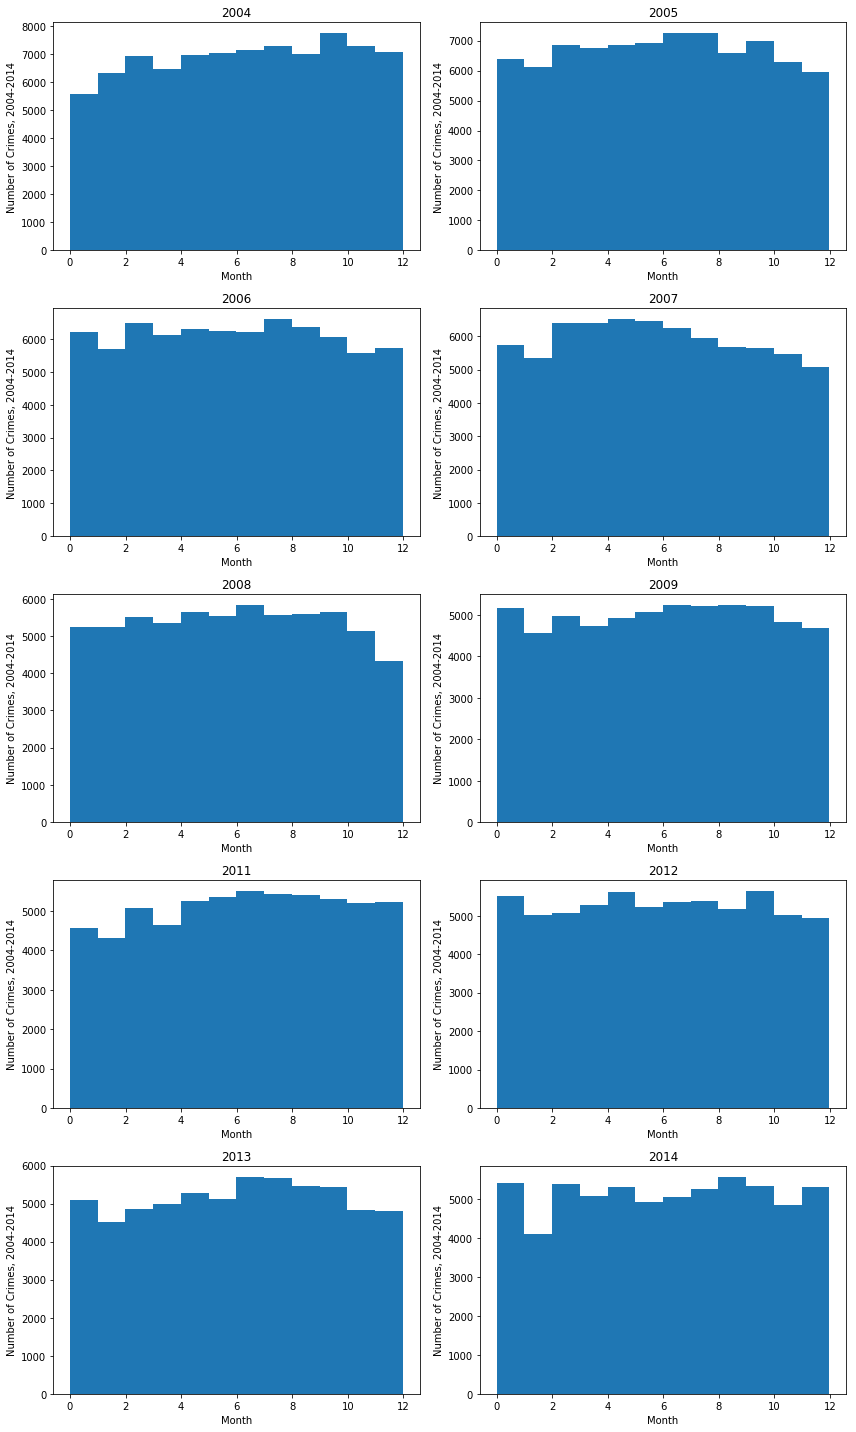

In [24]:
plt.figure(figsize=(12, 20))
for i in range(len(all_years)):
    plt.subplot(5,2,i+1)
    plt.hist([(get_date(x)-all_years[i])*12 for x in df[df['Year']==all_years[i]]['Report Date']], bins=12)
    plt.title('{}'.format(all_years[i]))
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes, 2004-2014')
    
plt.tight_layout()
plt.show()

In [ ]:
month_weights = [1/31, 1/28, 1/31, 1/30, 1/31, 1/30, 1/31, 1/31, 1/30, 1/31, 1/30, 1/31]

plt.hist([get_month(x) for x in df['Report Date']], bins=12)
plt.xlabel('Month')
plt.ylabel('Number of Crimes per Day, 2004-2014')
plt.ylim(45000, 60000)
plt.show()

## Number of Crimes By Neighborhood

In [25]:
df.Year.value_counts()

2004    82958
2005    80256
2006    73590
2007    70964
2008    64618
2012    63279
2013    61779
2014    61497
2011    61281
2009    59853
Name: Year, dtype: int64

In [26]:
neighborhood = 'Sabin'.upper() # Enter the Neighborhood you'd like to see.

df[df['Neighborhood']==neighborhood]['Year'].value_counts()

2004    437
2005    400
2008    330
2006    329
2007    262
2011    248
2013    247
2009    246
2012    228
2014    217
Name: Year, dtype: int64

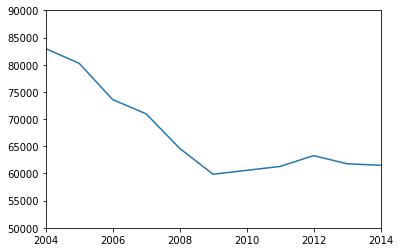

In [31]:
df['Year'].value_counts().sort_index().plot()
plt.ylim([50000, 90000])
plt.show()